In [1]:
import os
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week1\\Week1-10Academy-User-Analysis'

In [3]:
from src.plots import Plot

In [4]:
df = pd.read_csv('data/outliers_clean.csv')

In [5]:
plot = Plot()

In [6]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141014 entries, 0 to 141013
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       141014 non-null  float64
 1   start                           141014 non-null  object 
 2   start_ms                        141014 non-null  float64
 3   end                             141014 non-null  object 
 4   end_ms                          141014 non-null  float64
 5   dur._(ms)                       141014 non-null  float64
 6   imsi                            141014 non-null  float64
 7   msisdn/number                   141014 non-null  float64
 8   imei                            141014 non-null  float64
 9   last_location_name              141014 non-null  object 
 10  avg_rtt_dl_(ms)                 141014 non-null  float64
 11  avg_rtt_ul_(ms)                 141014 non-null  float64
 12  avg_bearer_tp_dl

In [71]:
# Aggregate engagement metrics per customer (by MSISDN)
customer_engagement = df.groupby("msisdn/number").agg({
    "bearer_id": "count",  # Sessions frequency
    "dur._(ms)": "sum",  # Total session duration
    "total_dl_(bytes)": "sum",  # Total download traffic
    "total_ul_(bytes)": "sum",  # Total upload traffic
}).rename(columns={
    "bearer_id": "session_frequency",
    "dur._(ms)": "total_session_duration",
    "total_dl_(bytes)": "total_download_traffic",
    "total_ul_(bytes)": "total_upload_traffic",
})

customer_engagement["total_traffic"] = customer_engagement["total_download_traffic"] + customer_engagement["total_upload_traffic"]
# Display the first few rows of the aggregated data
customer_engagement.head()  # Summary statistics for the aggregated data


,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09
3.360101e+10,2,253983.0,5.552080e+08,60009249.0,6.152172e+08


In [72]:
customer_engagement.describe()

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
count,100187.000000,1.001870e+05,1.001870e+05,1.001870e+05,1.001870e+05
mean,1.407508,1.452165e+05,6.394800e+08,5.787595e+07,6.973559e+08
std,3.290613,2.798421e+05,1.526077e+09,1.375910e+08,1.660781e+09
min,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,3.324901e+07
25%,1.000000,6.951900e+04,3.148002e+08,3.641702e+07,3.584078e+08
50%,1.000000,1.011980e+05,5.709696e+08,4.686072e+07,6.186261e+08
75%,2.000000,1.727990e+05,8.082853e+08,6.607412e+07,8.583293e+08
max,1011.000000,6.709022e+07,4.606132e+11,4.211225e+10,5.027255e+11


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '33603127838.0'),
  Text(1, 0, '33604515716.0'),
  Text(2, 0, '33614892860.0'),
  Text(3, 0, '33625779332.0'),
  Text(4, 0, '33626320676.0'),
  Text(5, 0, '33659725664.0'),
  Text(6, 0, '33663706799.0'),
  Text(7, 0, '33667163239.0'),
  Text(8, 0, '33675877202.0'),
  Text(9, 0, '33760536639.0')])

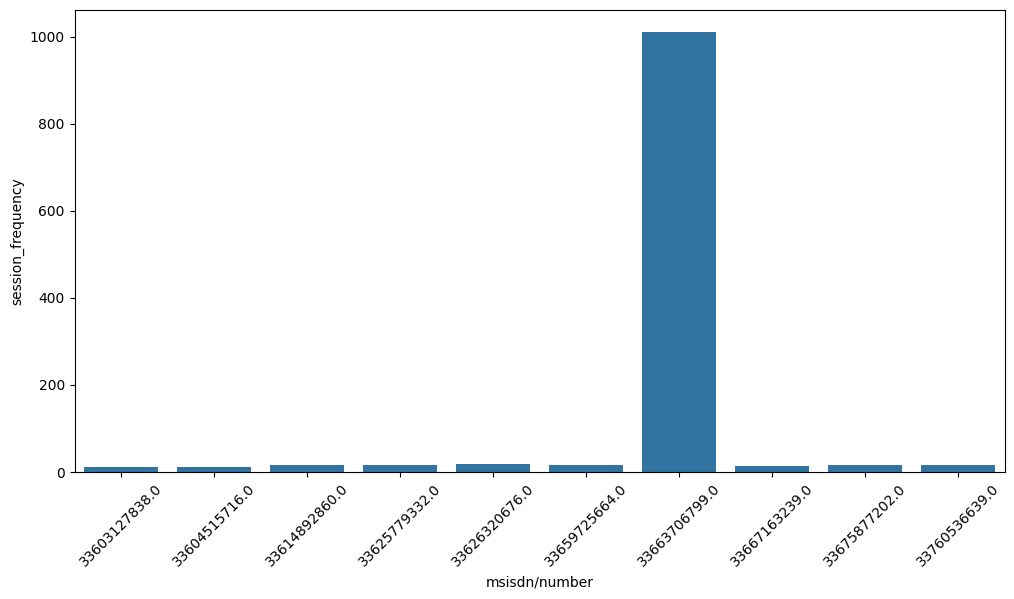

In [73]:
# Top 10 Customers with Highest Session Frequency
customer_engagement.nlargest(10, "session_frequency")

# Make a bar plot for the top 10 customers with highest session frequency
plt.figure(figsize=(12, 6))
sns.barplot(x="msisdn/number", y="session_frequency", data=customer_engagement.nlargest(10, "session_frequency"))
plt.xticks(rotation=45)

Seems like one USER(33663706799.0) has a session with largest session frequency, lets remove it for now

In [74]:
column_name = 'msisdn/number'
value = 33663706799.0
mask = customer_engagement.index == value
customer_engagement_filtered_max = customer_engagement[~mask]

C:\Users\user\AppData\Local\Temp\ipykernel_14668\3328664298.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x="msisdn/number", y="session_frequency", data=customer_engagement_filtered_max.nlargest(10, "session_frequency"), color="purple", hue="session_frequency")


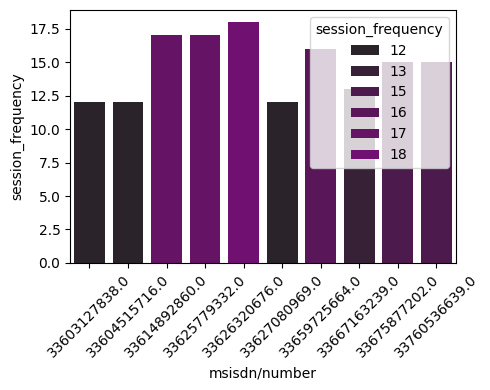

In [75]:
plt.figure(figsize=(5, 4))
sns.barplot(x="msisdn/number", y="session_frequency", data=customer_engagement_filtered_max.nlargest(10, "session_frequency"), color="purple", hue="session_frequency")
plt.xticks(rotation=45)
plt.tight_layout()

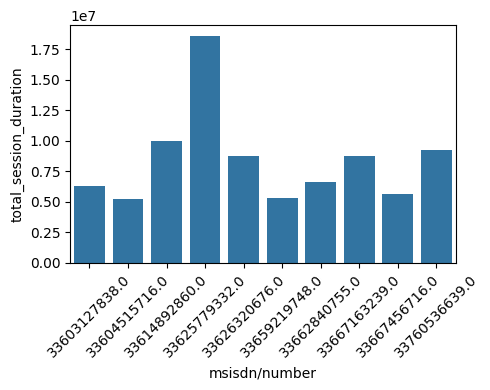

In [76]:
plt.figure(figsize=(5, 4))
sns.barplot(x="msisdn/number",
             y="total_session_duration",
             data=customer_engagement_filtered_max.nlargest(10, "total_session_duration"))
plt.xticks(rotation=45)
plt.tight_layout()

In [140]:
# Find the top 10 customers for each engagement metric
top_10_session_frequency = customer_engagement.nlargest(10, "session_frequency")
top_10_total_session_duration = customer_engagement.nlargest(10, "total_session_duration")
top_10_total_download_traffic = customer_engagement.nlargest(10, "total_download_traffic")
top_10_total_upload_traffic = customer_engagement.nlargest(10, "total_upload_traffic")

# Return the top 10 customers for each metric
top_10_session_frequency

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,7.971167e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,8.846226e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,8.499621e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,7.705863e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,7.891111e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,8.514774e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,5.618394e+09
3.360313e+10,12,6287761.0,4.540607e+09,435587631.0,4.976195e+09
3.360452e+10,12,5207990.0,5.096079e+09,391775856.0,5.487855e+09


In [78]:
top_10_total_session_duration


,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
3.366284e+10,9,6614270.0,3.593674e+09,4.064244e+08,4.000098e+09
3.360313e+10,12,6287761.0,4.540607e+09,4.355876e+08,4.976195e+09
3.366746e+10,6,5649882.0,2.334299e+09,2.662226e+08,2.600522e+09


In [79]:
top_10_total_download_traffic

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
3.366646e+10,11,4536757.0,6.903440e+09,4.050610e+08,7.308501e+09
3.366471e+10,11,2927785.0,6.400774e+09,4.712445e+08,6.872018e+09


In [80]:
top_10_total_upload_traffic  # Display the results

,session_frequency,total_session_duration,total_download_traffic,total_upload_traffic,total_traffic
msisdn/number,,,,,
3.366371e+10,1011,67090218.0,4.606132e+11,4.211225e+10,5.027255e+11
3.362578e+10,17,18553754.0,7.770043e+09,7.295774e+08,8.499621e+09
3.376054e+10,15,9279434.0,7.811295e+09,7.034786e+08,8.514774e+09
3.361489e+10,17,9966898.0,8.156743e+09,6.894830e+08,8.846226e+09
3.362632e+10,18,8791927.0,7.301517e+09,6.696507e+08,7.971167e+09
3.365973e+10,16,4035428.0,7.081602e+09,6.242603e+08,7.705863e+09
3.367588e+10,15,4865947.0,7.309542e+09,5.815688e+08,7.891111e+09
3.366716e+10,13,8744914.0,5.052068e+09,5.663264e+08,5.618394e+09
3.369879e+10,11,5169128.0,6.010556e+09,5.303431e+08,6.540899e+09


These top 10 customers demonstrate varying levels of engagement across each metric. Now that we've identified the top customers, the next step is to normalize these metrics and perform a k-means clustering with k=3.

In [88]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# Normalize the engagement metrics for clustering

# normalizer = Normalizer() # Uncomment this line to use Normalizer
# scaler = StandardScaler() # Uncomment this line to use StandardScaler
_MinMaxScaler = MinMaxScaler() # Uncomment this line to use MinMaxScaler

normalized_engagement = _MinMaxScaler.fit_transform(customer_engagement)

# Run K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
customer_engagement["cluster"] = kmeans.fit_predict(normalized_engagement)

# Compute the minimum, maximum, average, and total for each metric in each cluster
cluster_summary = customer_engagement.groupby("cluster").agg({
    "session_frequency": ["min", "max", "mean", "sum"],
    "total_session_duration": ["min", "max", "mean", "sum"],
    "total_download_traffic": ["min", "max", "mean", "sum"],
    "total_upload_traffic": ["min", "max", "mean", "sum"],
    "total_traffic": ["min", "max", "mean", "sum"],
})

# Display the summary statistics for each cluster
cluster_summary  # Summarize the results for each cluster


session_frequency                            total_session_duration  \
                      min   max         mean     sum                    min   
cluster                                                                       
0                       1     4     1.205984  109232                 7142.0   
1                       1    18     3.201644   30771                63335.0   
2                    1011  1011  1011.000000    1011             67090218.0   

                                                total_download_traffic  \
                max          mean           sum                    min   
cluster                                                                  
0          574121.0  1.115247e+05  1.010135e+10           8.827082e+06   
1        18553754.0  4.557662e+05  4.380369e+09           1.904514e+07   
2        67090218.0  6.709022e+07  6.709022e+07           4.606132e+11   

                                                  total_upload_traffic  \
                  max          mean           sum                  min   
cluster                                                                  
0        1.992887e+09  5.391799e+08  4.883622e+13         2.866892e+06   
1        8.156743e+09  1.536858e+09  1.477074e+13         1.231720e+07   
2        4.606132e+11  4.606132e+11  4.606132e+11         4.211225e+10   

                                                  total_traffic                \
                  max          mean           sum           min           max   
cluster                                                                         
0        1.800162e+08  4.951656e+07  4.484962e+12  3.324901e+07  2.069444e+09   
1        7.295774e+08  1.322800e+08  1.271343e+12  5.714004e+07  8.846226e+09   
2        4.211225e+10  4.211225e+10  4.211225e+10  5.027255e+11  5.027255e+11   

                                     
                 mean           sum  
cluster                              
0        5.886965e+08  5.332119e+13  
1        1.669138e+09  1.604209e+13  
2        5.027255e+11  5.027255e+11

## Cluster 0
- Total Session Duration: Ranges from 85,554 ms to 18,553,754 ms, with a mean of approximately 474,150 ms.
- Total Download Traffic: Has a wide range, from about 19 MB to 8 GB, with an average of about 1.5 GB.
- Total Upload Traffic: Varies between 9 MB and 729 MB, with a mean of about 131 MB.
    - Session Frequency: Customers in this cluster have between 1 and 18 sessions, with an average of 3 sessions.
    - Total Traffic: The total traffic ranges from about 57 MB to 8.8 GB, with an average of 1.6 GB.
This cluster appears to represent low-to-moderate engagement customers with a small number of sessions and moderate traffic levels.

# Cluster 1
- Total Session Duration: Ranges from 7,142 ms to 451,768 ms, with a mean of approximately 111,216 ms.
- Total Download Traffic: Between 8.8 MB and 2.3 GB, with a mean of about 546 MB.
- Total Upload Traffic: Between 2.8 MB and 204 MB, with a mean of about 49 MB.
    - Session Frequency: This cluster has between 1 and 4 sessions, with a mean of about 1.2 sessions.
    - Total Traffic: The total traffic ranges from about 33 MB to 2.4 GB, with a mean of about 596 MB.
Cluster 1 has customers with lower session frequency and traffic. These are likely low-engagement customers with occasional activity.

# Cluster 2
- Total Session Duration: This cluster has only one customer with a session duration of 67,090,218 ms (the outlier).
- Total Download Traffic: This customer has over 460 GB of download traffic.
- Total Upload Traffic: This customer has 42 GB of upload traffic.
    - Session Frequency: This cluster contains one customer with 1,011 sessions.
    - Total Traffic: Total traffic in this cluster is approximately 502 GB.
Cluster 2 represents high-engagement customers with significant traffic and session frequency. This is an outlier cluster.

## Interpretation
- Cluster 0: This cluster represents customers with low engagement across all metrics. They have fewer sessions, shorter durations, and lower traffic.
- Cluster 1: This cluster is an outlier with extremely high engagement in all metrics. This suggests a highly active user or a unique use case.
- Cluster 2: This cluster represents customers with moderate engagement, characterized by longer session durations and higher download/upload traffic than Cluster 0.

<Figure size 640x480 with 0 Axes>

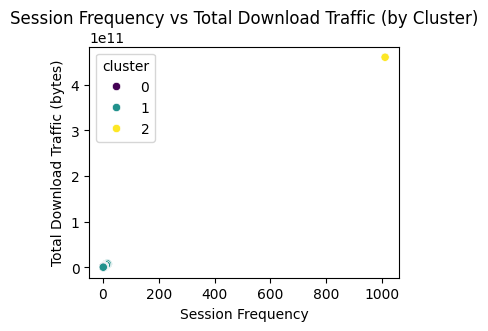

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for total download traffic vs session frequency, color-coded by cluster and make it fit in to the visual box size and scale down the x and y
plt.tight_layout()
plt.figure(figsize=(4, 3))
sns.scatterplot(
    data=customer_engagement,
    x="session_frequency",
    y="total_download_traffic",
    hue="cluster",
    palette="viridis",
)
plt.title("Session Frequency vs Total Download Traffic (by Cluster)")
plt.xlabel("Session Frequency")
plt.ylabel("Total Download Traffic (bytes)")
plt.show()  # Display the plot


- Cluster 0: Generally low session frequency and low download traffic.
- Cluster 1: Exhibits moderate session frequency with varied levels of download traffic.
- Cluster 2: Represents a single customer with extremely high session frequency and download traffic.

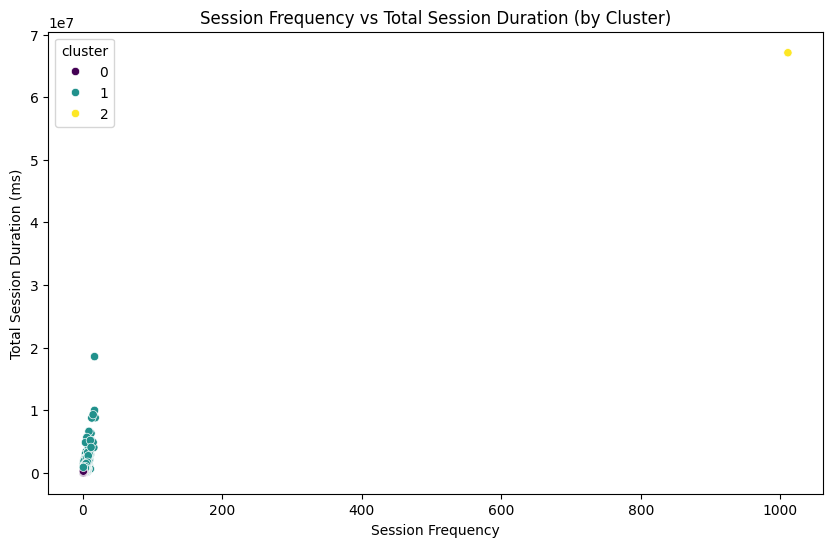

In [90]:
# Scatter plot for total session duration vs session frequency, color-coded by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_engagement,
    x="session_frequency",
    y="total_session_duration",
    hue="cluster",
    palette="viridis",
)
plt.title("Session Frequency vs Total Session Duration (by Cluster)")
plt.xlabel("Session Frequency")
plt.ylabel("Total Session Duration (ms)")
plt.show()  # Display the plot


C:\Users\user\AppData\Local\Temp\ipykernel_14668\1541228237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


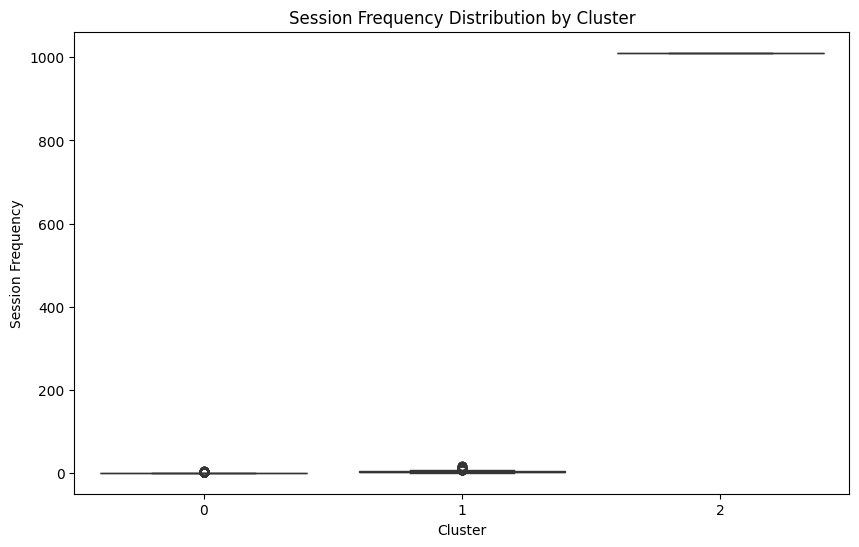

In [91]:
# Re-attempt the box plot for session frequency across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=customer_engagement,
    x="cluster",
    y="session_frequency",
    palette="viridis",
)
plt.title("Session Frequency Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Session Frequency")
plt.show()  # Display the box plot


In [136]:
# Create a dictionary to map application names to corresponding download and upload traffic columns
app_traffic_dict = {
    "social_media": ["social_media_dl_(bytes)", "social_media_ul_(bytes)"],
    "google": ["google_dl_(bytes)", "google_ul_(bytes)"],
    "email": ["email_dl_(bytes)", "email_ul_(bytes)"],
    "youtube": ["youtube_dl_(bytes)", "youtube_ul_(bytes)"],
    "netflix": ["netflix_dl_(bytes)", "netflix_ul_(bytes)"],
    "gaming": ["gaming_dl_(bytes)", "gaming_ul_(bytes)"],
    "other": ["other_dl_(bytes)", "other_ul_(bytes)"]
}

# Calculate the total traffic (download + upload) per application for each customer
app_traffic_per_user = pd.DataFrame(index=customer_engagement_filtered_max.index)

for app_name, traffic_columns in app_traffic_dict.items():
    dl_col, ul_col = traffic_columns  # Separate download and upload columns
    app_traffic_per_user[f"{app_name}_total_traffic"] = (
        df.groupby("msisdn/number")[dl_col].sum() + df.groupby("msisdn/number")[ul_col].sum()
    )

# Now find the top 10 most engaged users for each application based on total traffic
top_10_app_users = {}

for app_name in app_traffic_dict.keys():
    top_10_app_users[app_name] = app_traffic_per_user.nlargest(10, f"{app_name}_total_traffic")

top_10_app_users  # Display the top 10 most engaged users for each application


{'social_media':                social_media_total_traffic  google_total_traffic  \
 msisdn/number                                                     
 3.362632e+10                   43374779.0           152191852.0   
 3.376054e+10                   39783189.0           123223099.0   
 3.365973e+10                   35412358.0           116516345.0   
 3.361489e+10                   28294544.0           127973787.0   
 3.362578e+10                   27135500.0           142307915.0   
 3.366716e+10                   24247850.0           105032696.0   
 3.378632e+10                   23974919.0           110254484.0   
 3.366907e+10                   23800834.0            77824684.0   
 3.360313e+10                   23077825.0            86929016.0   
 3.365849e+10                   23000066.0            76434143.0   
 
                email_total_traffic  youtube_total_traffic  \
 msisdn/number                                               
 3.362632e+10            42418782.0       

In [137]:
flattened_dict = {k: v for d in top_10_app_users.values() for k, v in d.items()}
_top_10_app_users = pd.DataFrame.from_dict(flattened_dict)
_top_10_app_users

,social_media_total_traffic,google_total_traffic,email_total_traffic,youtube_total_traffic,netflix_total_traffic,gaming_total_traffic,other_total_traffic
msisdn/number,,,,,,,
3.362632e+10,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09
3.361489e+10,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09
3.367588e+10,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09
3.362578e+10,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
3.360313e+10,23077825.0,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
3.365973e+10,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09
3.362708e+10,17808911.0,87125921.0,23567219.0,308790774.0,267040897.0,4.972353e+09,5.117791e+09
3.376127e+10,14496080.0,97089988.0,20753721.0,272789592.0,292091341.0,4.274099e+09,5.077779e+09
3.365836e+10,17285759.0,76507138.0,19682048.0,260989846.0,264142078.0,5.705920e+09,5.013651e+09


In [141]:
customer_engagement.groupby('cluster').sum()['session_frequency']

cluster
0    109232
1     30771
2      1011
Name: session_frequency, dtype: int64

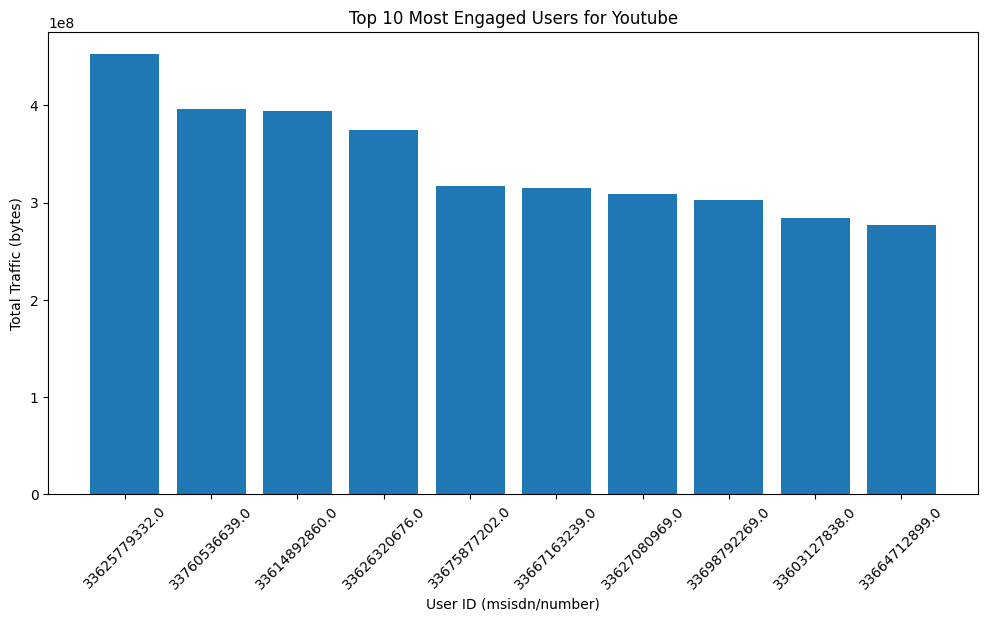

In [143]:
import matplotlib.pyplot as plt

# Define the application name for which you want to plot the top 10 most engaged users
application_name = "youtube"  # You can change this to "social_media", "google", "email", "netflix", "gaming", "other"

# Retrieve the top 10 most engaged users for the specified application
top_10_users = top_10_app_users[application_name]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_users.index.astype(str), top_10_users[f"{application_name}_total_traffic"])
plt.xlabel("User ID (msisdn/number)")
plt.ylabel("Total Traffic (bytes)")
plt.title(f"Top 10 Most Engaged Users for {application_name.title()}")
plt.xticks(rotation=45)
plt.show()


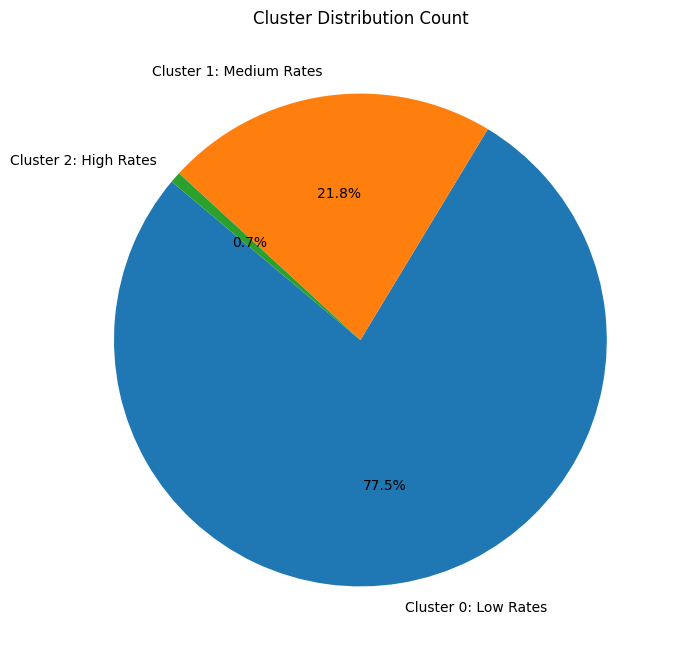

In [134]:
# data = [cluster1.sessions.count(), cluster2.sessions.count(), cluster3.sessions.count()]
keys = ['Cluster 0: Low Rates', 'Cluster 1: Medium Rates', 'Cluster 2: High Rates']
# define Seaborn color palette to use
plot = Plot()
plot.plot_pie(data=customer_engagement.groupby('cluster').sum()['session_frequency'], label=keys, title="Cluster Distribution Count")